
# Machine Learning & AI: Practice 1

-----------


<br><br>

<h3><div style="text-align: center"> 한양대학교 에리카, AI Lab <br><br>
이상근 </div> </h3>


## Pandas.DaraFrame Attributes

  Attr   | Desc
  ------ | :-----
  T 	 | Transpose index and columns 
  values | Numpy representation of NDFrame
         |
  ix 	 | A primarily label-location based indexer, with integer position fallback 
  iloc 	 | Purely integer-location based indexing for selection by position
  loc 	 | Purely label-location based indexer for selection by label
         |
  ndim 	 | Number of axes / array dimensions
  shape  | Return a tuple representing the dimensionality of the DataFrame
  size 	 | number of elements in the NDFrame
         |
  at |	Fast label-based scalar accessor
  iat 	| Fast integer location scalar accessor.
       |
  axes |	Return a list with the row axis labels and column axis labels as the only members.
 dtypes | 	Return the dtypes in this object.
  empty | 	True if NDFrame is entirely empty [no items], meaning any of the axes are of length 0.
  ftypes | 	Return the ftypes (indication of sparse/dense and dtype) in this object.


## Prepare gene expression data

In [1]:
import os
import pandas as pd

matrix1 = pd.read_table('./data/brca_expression_5yr_survive.tsv', index_col=0)
matrix2 = pd.read_table('./data/brca_expression_5yr_dead.tsv', index_col=0)
print(matrix1.shape)
print(matrix2.shape)

(19785, 123)
(19785, 30)


In [2]:
matrix = pd.concat([matrix1, matrix2], axis=1)
print(matrix.shape)
#matrix

(19785, 153)


## Select top 2000 genes with differential expression

In [3]:
num_variables = 2000

expr_var = matrix.var(axis=1)

expr_var_sorted = expr_var.sort_values(ascending=False)

top_names = expr_var_sorted[0:num_variables]
print(top_names)

Genes
SCGB2A2       16.306894
SCGB1D2       13.298169
TFF1          11.900891
PIP           11.504788
MUCL1         11.223484
CALML5         9.983032
AGR2           9.490496
LTF            9.427619
S100A7         9.364815
AGR3           9.314629
TFF3           9.293344
FDCSP          8.883313
CEACAM6        8.793593
CPB1           7.793018
KRT81          7.686041
GABRP          7.661703
S100A9         7.431961
CRABP1         7.414645
S100A8         7.064535
EEF1A2         6.838855
FOXA1          6.562160
CLIC6          6.431489
CLEC3A         6.265374
WFDC2          6.224451
GFRA1          6.103769
PEG10          6.096727
SLC7A2         6.056653
S100P          6.053938
BMPR1B         6.034866
FABP4          5.963725
                ...    
SPOPL          1.001627
AFF4           1.001539
SORBS1         1.001514
NUCB2          1.001399
PABPC1L        1.001020
SLCO2A1        1.000985
RTN2           1.000724
TGFBR2         1.000622
KCND3          1.000461
ARSD           1.000269
NEDD4L    

In [4]:
matrix = matrix.loc[top_names.index]
matrix1 = matrix1.loc[top_names.index]
matrix2 = matrix2.loc[top_names.index]
print(matrix1.shape, matrix2.shape, matrix.shape)

(2000, 123) (2000, 30) (2000, 153)


## Split the data into training and test set

In [5]:
import numpy as np

# set seed for random number generator
seed = 0
np.random.seed(seed)

# select 30% of each group as test data
sel1 = np.random.choice(matrix1.shape[1], size=41, replace=False)
sel2 = np.random.choice(matrix2.shape[1], size=10, replace=False)

test = pd.concat([matrix1.iloc[:, sel1], matrix2.iloc[:, sel2]], axis=1)

# drop the samples from the tables
matrix1.drop(matrix1.columns[sel1], axis=1, inplace=True)
matrix2.drop(matrix2.columns[sel2], axis=1, inplace=True)
matrix = pd.concat([matrix1, matrix2], axis=1)
print(matrix1.shape, matrix2.shape, matrix.shape, test.shape)


(2000, 82) (2000, 20) (2000, 102) (2000, 51)


## Row: Samples, Columnes: Attributes

In [6]:
matrix = matrix.T # training data
test = test.T # test data

## Data Pre-processing: Standardization

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(matrix.values) # not on the test set
X_train_std = sc.transform(matrix.values)
X_test_std = sc.transform(test.values)

y_train = np.r_[matrix1.shape[1]*[0], matrix2.shape[1]*[1]]
y_test = np.r_[sel1.size*[0], sel2.size*[1]]
#y_test

## Classification with Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000, random_state=0)
lr.fit(X_train_std, y_train)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_train_std)
print('Train-set Accuracy: %.2f' % accuracy_score(y_train, y_pred))
y_pred = lr.predict(X_test_std)
print('Test-set Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Train-set Accuracy: 1.00
Test-set Accuracy: 0.67


## Classification with SVM

In [10]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=0, C=10.0)
svm.fit(X_train_std, y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
y_pred = svm.predict(X_train_std)
print('Train-set Accuracy: %.2f' % accuracy_score(y_train, y_pred))
y_pred = svm.predict(X_test_std)
print('Test-set Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Train-set Accuracy: 1.00
Test-set Accuracy: 0.78


## PCA Analysis

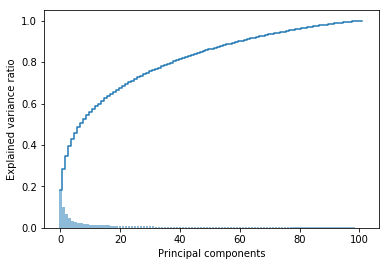

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

vals = pca.explained_variance_ratio_[:]

plt.bar(range(0, vals.size), vals, alpha=0.5, align='center')
plt.step(range(0, vals.size), np.cumsum(vals), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

(102, 10)


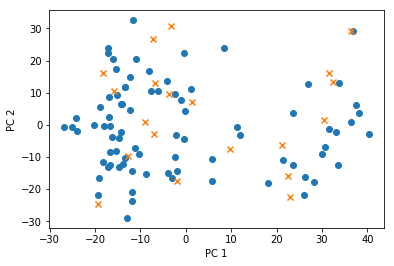

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

print(X_train_pca.shape)

#plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.scatter(X_train_pca[y_train==0, 0], X_train_pca[y_train==0, 1], marker='o')
plt.scatter(X_train_pca[y_train==1, 0], X_train_pca[y_train==1, 1], marker='x')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()
